----
# Making plaquettes
----

The idea is having a mostly-not-visual tool in the form of a Python module with a function which receives:
- a list of data qubits
- a list of stabilizers
and creates an internal representation (IR) of the code assuming that an extra ancilla qubit is available with the right connectivity.

One can then emit the `stim` code from the IR of the code.

To illustrate the idea, with many suboptimal choices `:-)`, I added a couple of utility functions to `utils.py` and a small graphical interface to `gui.py`.  
Note that using a networkx graph as IR for the QEC code is suboptimal.  
For example, it requires additional info to identify data, x-ancilla, and z-ancilla qubits.

In this context, easy improvements are:
- function to prune the edges between data qubits
- function to save/load the IR (here a graph)
- function to emit STIM code assuming native connectivity
- function to check code compatibility (i.e. data qubit exists, stabilizers pairwise commute, ...)
- function to print the IR which does not rotate the graph and understands the overall 2d-grid structure
- make the order of Pauli matrices in the stabilizer count (for the generation of the circuit)

Sections:
- <a href=#board>Make the board</a>
- <a href=#stim>Emit stim code</a>

----
<a id='top'></a>

In [1]:
# Set working directory to be the main directory of the repo.
import os
print('working directory:', os.getcwd())

import numpy as np              # Import NumPy library
import networkx as nx
import matplotlib.pyplot as plt # Import graphical library for plots

from utils import custom_grid_2d_graph, add_stabilizer_to_graph, shift_stabilizer, get_options_for_draw, remove_edges_between_data
from gui import launch_interactive_composer

working directory: /data/nfs_home/giangiac/tqec/proj_making-plaquettes


<a id='board'></a>

----
## Make the board

First we present the non-visual approach, then a simple GUI.

<a href=#top>Back to top</a>


data qubits in yellow, X ancillas in blue, Z ancillas in red


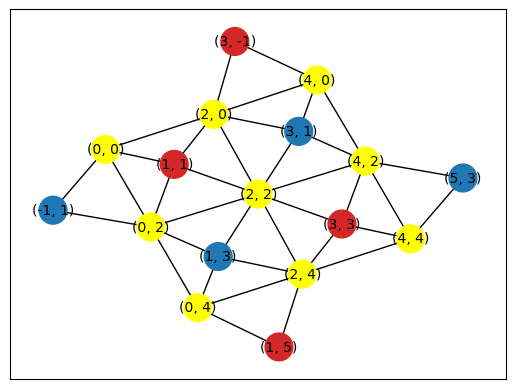

In [3]:
# Non-visual approach for the Surface Code with d=3.

# Create 2d grid of data qubits.
d = 3
G = custom_grid_2d_graph(d, d)
# Add stabilizers.
x_ancillas, z_ancillas = [], []
stab = 'Z(0,0).Z(2,0).Z(0,2).Z(2,2)'
for shift in ['(0,0)', '(2,2)']:
    s = shift_stabilizer(stab, shift)
    G, ancilla = add_stabilizer_to_graph(G, s)
    z_ancillas.append(ancilla)
stab = 'Z(0,4).Z(2,4)'
for shift in ['(0,0)', '(2,-4)']:
    s = shift_stabilizer(stab, shift)
    G, ancilla = add_stabilizer_to_graph(G, s)
    z_ancillas.append(ancilla)
#
stab = 'X(0,2).X(0,4).X(2,2).X(2,4)'
for shift in ['(0,0)', '(2,-2)']:
    s = shift_stabilizer(stab, shift)
    G, ancilla = add_stabilizer_to_graph(G, s)
    x_ancillas.append(ancilla)
stab = 'X(0,0).X(0,2)'
for shift in ['(0,0)', '(4,2)']:
    s = shift_stabilizer(stab, shift)
    G, ancilla = add_stabilizer_to_graph(G, s)
    x_ancillas.append(ancilla)

# Draw graph.
#G = remove_edges_between_data(G)                            # <-- the plot becomes somehow less readable.
options = get_options_for_draw(G, x_ancillas, z_ancillas)
pos = nx.nx_agraph.graphviz_layout(G, prog="neato")
nx.draw_networkx(G, pos=pos, **options)
print('\ndata qubits in yellow, X ancillas in blue, Z ancillas in red')
plt.show()

In [4]:
# Simple GUI.
launch_interactive_composer()


<a id='stim'></a>

----
## Convert to stim code

<a href=#top>Back to top</a>

----
## END
----